In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraa1z","key":"c15ae290af9ccd1301d4eb84408fd746"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 46.8MB/s]


In [5]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df=pd.read_csv('/content/files/train.csv')
test=pd.read_csv('/content/files/test.csv')

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.shape

(2000, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [12]:
test.shape

(1000, 21)

In [13]:
TMPdf = df.copy()

# TASK 1

checking for missing values and Outliers

In [14]:
start = time.time()
df.isnull().sum()
print('run time : ' , (time.time() - start)) 

run time :  0.0027959346771240234


In [15]:
# check outliers using IQR
start = time.time()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('run time : ' , (time.time() - start)) 

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
price_range         1.50
dtype: float64
run time :  0.015508413314819336


In [16]:
res = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
res

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
res.value_counts()

battery_power  blue   clock_speed  dual_sim  fc     four_g  int_memory  m_dep  mobile_wt  n_cores  pc     px_height  px_width  ram    sc_h   sc_w   talk_time  three_g  touch_screen  wifi   price_range
False          False  False        False     False  False   False       False  False      False    False  False      False     False  False  False  False      False    False         False  False          1506
                                                                                                                                                               True     False         False  False           474
                                             True   False   False       False  False      False    False  False      False     False  False  False  False      False    False         False  False            15
                                                                                                                                                               True     Fals

# TASK 2 

Exploratory Data Analysis 

In [18]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [19]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

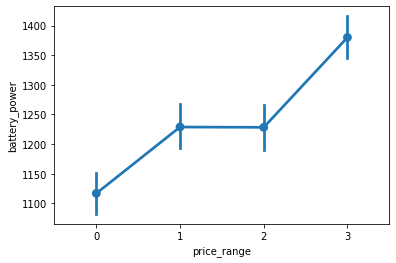

In [20]:
#plot relationship between some features and price
sns.pointplot(data=df, x="price_range", y="battery_power")
plt.show()

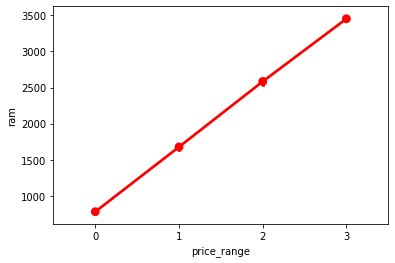

In [21]:
sns.pointplot(data=df, x="price_range", y="ram" , color = 'red')
plt.show()

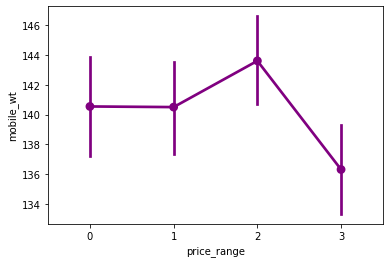

In [22]:
sns.pointplot(data=df, x="price_range", y="mobile_wt" , color = 'purple')
plt.show()

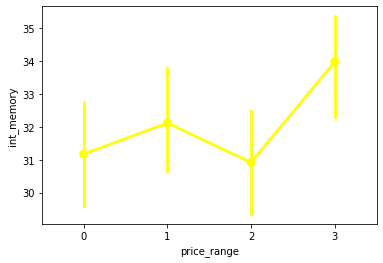

In [23]:
sns.pointplot(data=df, x="price_range", y="int_memory" , color = 'yellow')
plt.show()

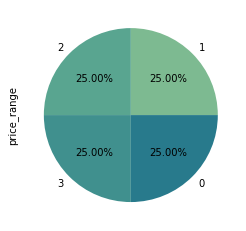

In [24]:
#plot categorical columns
color = sns.color_palette("crest")
df.price_range.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

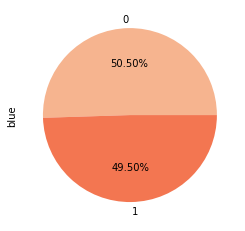

In [25]:
color = sns.color_palette("rocket_r")
df.blue.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

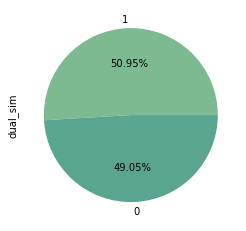

In [26]:
color = sns.color_palette("crest")
df.dual_sim.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

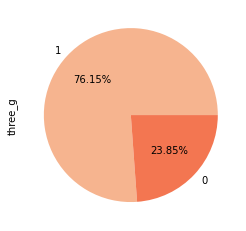

In [27]:
color = sns.color_palette("rocket_r")
df.three_g.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

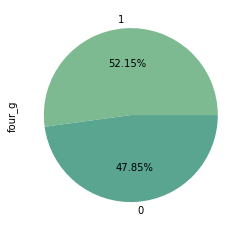

In [28]:
color = sns.color_palette("crest")
df.four_g.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

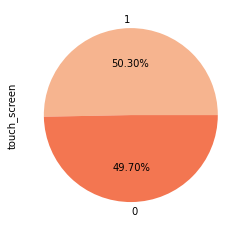

In [29]:
color = sns.color_palette("rocket_r")
df.touch_screen.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

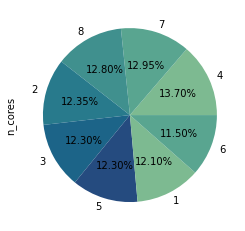

In [30]:
color = sns.color_palette("crest")
df.n_cores.value_counts().plot.pie(colors = color , autopct='%.2f%%')
plt.show()

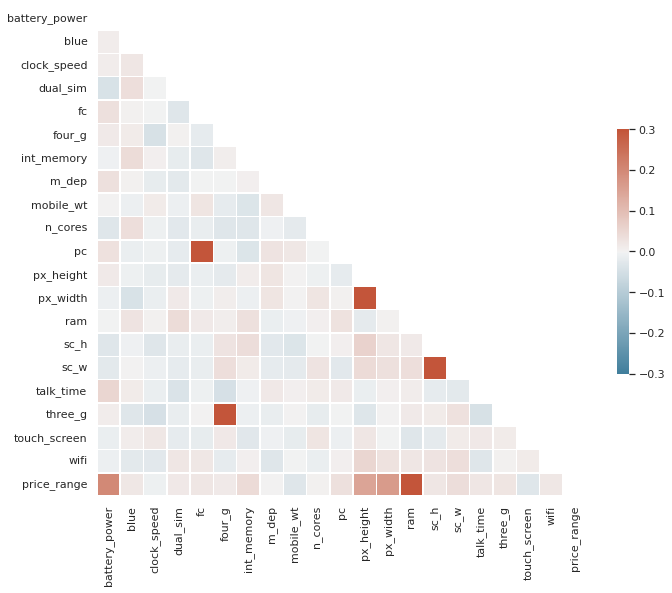

In [31]:
#plot features corelation using corelation matrix
#corr = df.corr()
#sns.heatmap(corr, cmap="YlGnBu", linewidths=.5)
#plt.show()

sns.set_theme(style="white")
rs = np.random.RandomState(20)
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, vmin = -.3 , center= 0 , square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [32]:
s= corr['price_range'].sort_values(ascending=False)

In [33]:
s.drop(s.index[0])

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# TASK 3

hypothesis tests

In [34]:
from scipy import stats

In [35]:
#q1 : touchscreen effects on battery power (using 2samples Ttest)
touchScreen = df[df.touch_screen == 1]
notTouchScreen = df[df.touch_screen == 0]

In [36]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(touchScreen.battery_power , notTouchScreen.battery_power,equal_var = False )

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -0.4700693156051378 , p_value : 0.6383568070887617
accept null hypothesis


In [37]:
# q2 : n_cores not affect on battery power (using ANOVA)
df.n_cores.unique()

array([2, 3, 5, 6, 1, 8, 4, 7])

In [38]:
n1 = df[df.n_cores==1]
n2 = df[df.n_cores==2]
n3 = df[df.n_cores==3]
n4 = df[df.n_cores==4]
n5 = df[df.n_cores==5]
n6 = df[df.n_cores==6]
n7 = df[df.n_cores==7]
n8 = df[df.n_cores==8]

In [39]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(n1.battery_power , n2.battery_power , n3.battery_power , n4.battery_power , n5.battery_power , n6.battery_power , n7.battery_power , n8.battery_power )

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 1.0090319220482968 , p_value : 0.42270358537750213
accept null hypothesis


In [40]:
#q3 : wifi can affect price range(using Chi square)

In [41]:
from scipy.stats import chi2_contingency
alpha = 0.1
chiS = pd.crosstab(df['wifi'],df['price_range'])
stat,pvalue,dof,expected_R = chi2_contingency(chiS)
print("pvalue : ",pvalue)

if pvalue <= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pvalue :  0.8359905195342198
accept null hypothesis


In [42]:
#q4 : mobiles have ram = 2000 on average(using 1sample Ttest)

In [43]:
alpha = 0.05 
tstat,p_value = stats.ttest_1samp(df['ram'],popmean = 2000 )
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 5.121056639293959 , p_value : 3.330034014107128e-07
reject null hypothesis


In [44]:
#q5 : dual_sim doesn't effect on talk time (using 2samples Ttest)
dual_sim = df[df.dual_sim == 1]
notdual_sim = df[df.dual_sim == 0]

In [45]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(dual_sim.talk_time , notdual_sim.talk_time ,equal_var = True )

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -1.7626880814916899 , p_value : 0.07810597736080419
accept null hypothesis


# TASK 4

model training

In [46]:
X=df.drop(['price_range'], axis=1)
y=df['price_range']

In [47]:
#TASK8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
y_train

132     2
1020    3
868     0
1640    2
263     0
       ..
651     2
619     2
276     3
788     2
336     3
Name: price_range, Length: 1600, dtype: int64

In [48]:
from sklearn.feature_selection import mutual_info_classif
res = mutual_info_classif(X_train, y_train, random_state=0)
res

array([0.05192272, 0.00858015, 0.        , 0.00849807, 0.00433109,
       0.        , 0.01306148, 0.        , 0.02966002, 0.00388993,
       0.        , 0.03116544, 0.01484668, 0.83047248, 0.        ,
       0.        , 0.        , 0.00560511, 0.        , 0.        ])

In [49]:
res = pd.Series(res)
res.index = X_train.columns
res.sort_values()

wifi             0.000000
talk_time        0.000000
clock_speed      0.000000
sc_w             0.000000
sc_h             0.000000
four_g           0.000000
pc               0.000000
m_dep            0.000000
touch_screen     0.000000
n_cores          0.003890
fc               0.004331
three_g          0.005605
dual_sim         0.008498
blue             0.008580
int_memory       0.013061
px_width         0.014847
mobile_wt        0.029660
px_height        0.031165
battery_power    0.051923
ram              0.830472
dtype: float64

In [50]:
selected_features1=[]
selected_features2=[]
selected_features3=[]
for index, value in res.items():
    if value>0:
        selected_features1.append(index)

for index, value in res.items():
    if value>0.005:
        selected_features2.append(index)

for index, value in res.items():
    if value>0.02:
        selected_features3.append(index)        

In [51]:
X_train1= X_train[selected_features1]
X_test1= X_test[selected_features1]
X_train1.head()

,battery_power,blue,dual_sim,fc,int_memory,mobile_wt,n_cores,px_height,px_width,ram,three_g
132,645,0,0,1,41,197,7,327,580,2962,1
1020,1119,0,1,0,23,164,4,821,915,3520,1
868,981,1,1,0,2,136,3,75,688,1539,0
1640,1269,1,1,16,41,180,8,406,1036,2341,0
263,767,0,0,4,28,175,4,344,1517,527,0


In [52]:
X_train2= X_train[selected_features2]
X_test2= X_test[selected_features2]

X_train2.head()

,battery_power,blue,dual_sim,int_memory,mobile_wt,px_height,px_width,ram,three_g
132,645,0,0,41,197,327,580,2962,1
1020,1119,0,1,23,164,821,915,3520,1
868,981,1,1,2,136,75,688,1539,0
1640,1269,1,1,41,180,406,1036,2341,0
263,767,0,0,28,175,344,1517,527,0


In [53]:
X_train3= X_train[selected_features3]
X_test3= X_test[selected_features3]

X_train3.head()

,battery_power,mobile_wt,px_height,ram
132,645,197,327,2962
1020,1119,164,821,3520
868,981,136,75,1539
1640,1269,180,406,2341
263,767,175,344,527


**Logistic regression**

logistic regression has OVA stategy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.6525


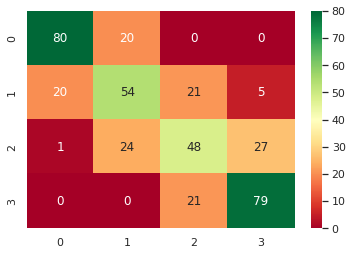

In [54]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

y_pred = LR_model.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")

print("Accuracy:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.695


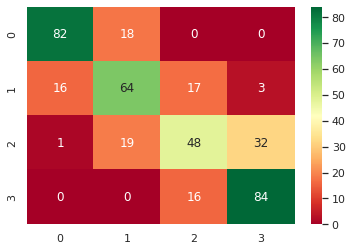

In [55]:
LR_modell = LogisticRegression(random_state= 20 , max_iter=200)
LR_modell.fit(X_train,y_train)
y_pred = LR_modell.predict(X_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")

print("Accuracy:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.7675


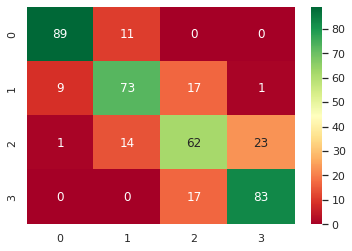

In [56]:
LR_modelll = LogisticRegression(random_state= 50 , max_iter=2000)
LR_modelll.fit(X_train,y_train)
y_pred = LR_modelll.predict(X_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")

print("Accuracy:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.7075


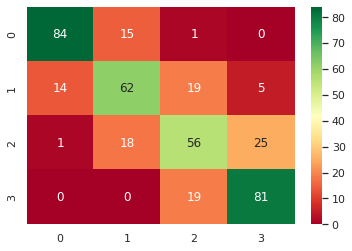

In [57]:
LR_modelll.fit(X_train1,y_train)
y_pred = LR_modelll.predict(X_test1)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.7275


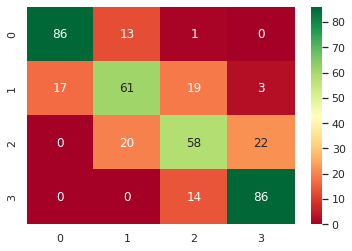

In [58]:
LR_modelll.fit(X_train2,y_train)
y_pred = LR_modelll.predict(X_test2)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9225


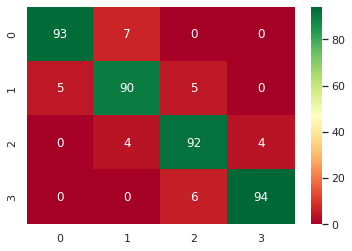

In [59]:
LR_modelll.fit(X_train3,y_train)
y_pred = LR_modelll.predict(X_test3)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

**Naive bayes**

Naive bayes has OVA stategy

Accuracy of Naive Bayes Classifier is:  0.8225


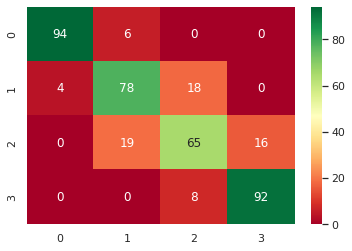

In [60]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of Naive Bayes Classifier is: ", accuracy_score(y_test,y_pred)) 

Accuracy of Naive Bayes Classifier is:  0.81


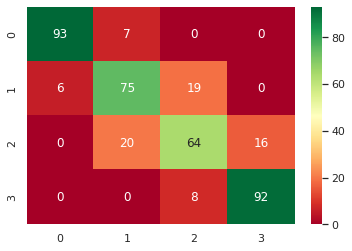

In [61]:
NB_model.fit(X_train1, y_train)
y_pred = NB_model.predict(X_test1)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of Naive Bayes Classifier is: ", accuracy_score(y_test,y_pred)) 

Accuracy of Naive Bayes Classifier is:  0.8025


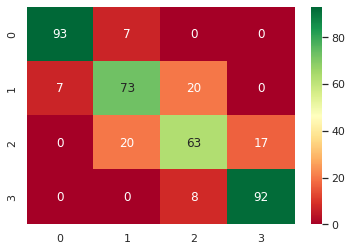

In [62]:
NB_model.fit(X_train2, y_train)
y_pred = NB_model.predict(X_test2)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of Naive Bayes Classifier is: ", accuracy_score(y_test,y_pred)) 

**Random forest**

Random forest has OVA stategy

Accuracy of random forest model is:  0.8775


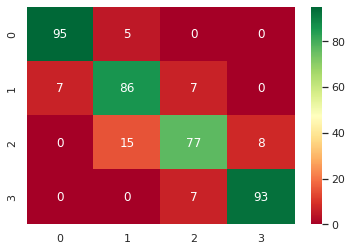

In [63]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators = 20, random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)


confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of random forest model is: ", accuracy_score(y_test,y_pred))

Accuracy of random forest model is:  0.885


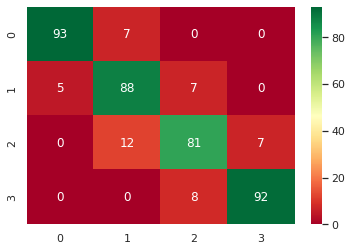

In [64]:
RF_model= RandomForestClassifier(n_estimators = 100, random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)


confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of random forest model is: ", accuracy_score(y_test,y_pred))

Accuracy of random forest model is:  0.9175


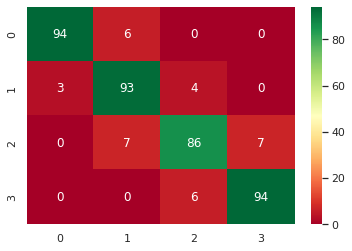

In [65]:
RF_model= RandomForestClassifier(n_estimators = 100, random_state = 0)
RF_model.fit(X_train1, y_train)
y_pred = RF_model.predict(X_test1)


confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of random forest model is: ", accuracy_score(y_test,y_pred))

Accuracy of random forest model is:  0.9275


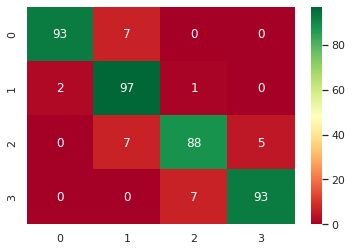

In [66]:
RF_model= RandomForestClassifier(n_estimators = 100, random_state = 10)
RF_model.fit(X_train2, y_train)
y_pred = RF_model.predict(X_test2)


confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of random forest model is: ", accuracy_score(y_test,y_pred))

Accuracy of random forest model is:  0.8775


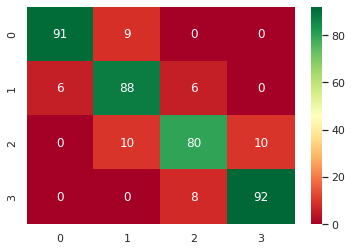

In [67]:
RF_model= RandomForestClassifier(n_estimators = 100, random_state = 10)
RF_model.fit(X_train3, y_train)
y_pred = RF_model.predict(X_test3)


confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of random forest model is: ", accuracy_score(y_test,y_pred))

# TASK 5

define the performance by confusion matrix

 برای تمامی مدل ها رسم شد confusion matrix

 نتیجه ای که از ماتریس های رسم شده مشخص است این است که مدل ها معمولا برای کلاس 3 کمترین کارایی و برای کلاس 1 و 4 بیشترین کارایی را دارند

یکی از دلایل کارایی کمتر مدل ها روی کلاس 3 این است که برخی داده های این کلاس طبق نمودار های رسم شده از حالت صعودی یا نزولی دیگر کلاس ها خارج میشود و این باعث خطا در مدل میشود.

نمونه های شکستگی داده ها در کلاس 3

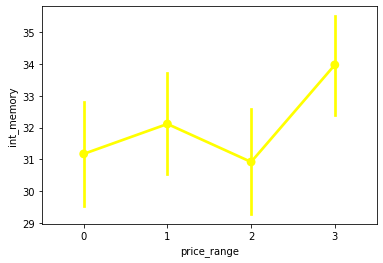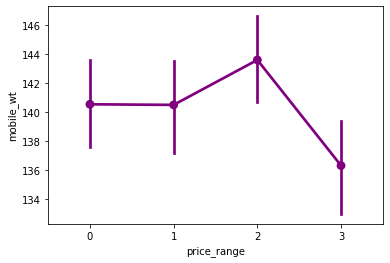

# TASK 6 

check data balance and solution for imbalanced data

بله

 داده ها متوازن هستند با توجه به اینکه بررسی کردیم و با نمودار دیدیم که از هر 4 
کلاس به مقدار مساوی رکورد موجود میباشد


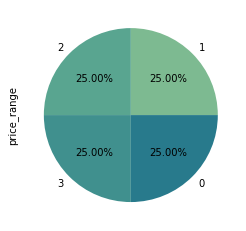

solution for imbalanced data



1- Random Oversampling نمونه برداری بیش نمونه گیری 

 شامل انتخاب نمونه های تصادفی از کلاس اقلیت با جایگزینی و تکمیل داده های آموزش با چندین نسخه از این نمونه است ، از این رو این امکان وجود دارد که یک نمونه واحد چندین بار انتخاب شود. در وافع در این روش نمونه ای اقلیت تکثیر می شوند تا تعداد 
 نمونه ها بیشتر شود

2-  Random Undersampling نمونه برداری کم نمونه گیری

این روش  برعکس نمونه برداری روش قبلی  است. این روش به دنبال انتخاب و حذف نمونه ها از کلاس اکثریت به طور تصادفی است ، در نتیجه تعداد مثال ها را در کلاس اکثریت در داده ها کاهش می دهد

3- SMOTE (Synthetic Minority Oversampling Technique) 

این روش زیر مجموعه ی روش بیش نمونه گیری است به این صورت که با استفاده از الگوریتم نزدیکترین همسایه برای ایجاد داده های مصنوعی کار می کند

(k-nearest neighbor algorithm)

 مراحل

بردار ویژگی و نزدیکترین همسایه آن را شناسایی میکند

فاصله بین دو نقطه نمونه را محاسبه میکند

فاصله را با یک عدد تصادفی بین 0 و 1 ضرب میکند

یک نقطه جدید در پاره خط در فاصله محاسبه شده شناسایی میکند

فرآیند را برای بردارهای مشخصه تکرار میکند

# TASK 7

Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
std = StandardScaler()
X=df.drop(['price_range'], axis=1)
y=df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
X_std_train = std.fit_transform(X_train)
X_std_train = pd.DataFrame(X_std_train, columns = X_train.columns)

X_std_test = std.transform(X_test)
X_std_test = pd.DataFrame(X_std_test, columns = X_test.columns)


Accuracy: 0.9675


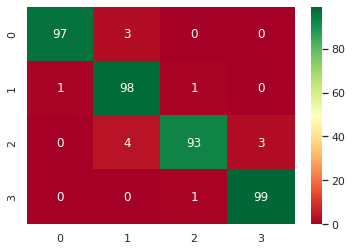

In [69]:
LR_modelll.fit(X_std_train,y_train)
y_pred = LR_modelll.predict(X_std_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy:  0.8775


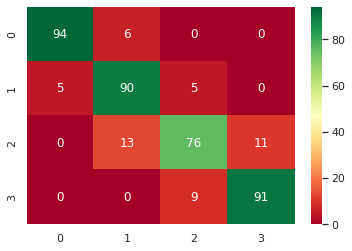

In [70]:
RF_model.fit(X_std_train, y_train)
y_pred = RF_model.predict(X_std_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy: ", accuracy_score(y_test,y_pred)) 

In [71]:
mms = MinMaxScaler()
X_mms_train = mms.fit_transform(X_train)
X_mms_train = pd.DataFrame(X_mms_train, columns = X_train.columns)

X_mms_test = mms.transform(X_test)
X_mms_test = pd.DataFrame(X_mms_test, columns = X_test.columns)

Accuracy: 0.935


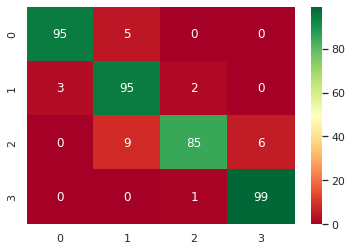

In [72]:
LR_modelll.fit(X_mms_train,y_train)
y_pred = LR_modelll.predict(X_mms_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy:  0.875


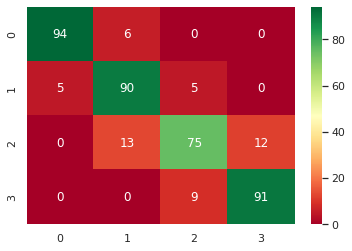

In [73]:
RF_model.fit(X_mms_train, y_train)
y_pred = RF_model.predict(X_mms_test)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy: ", accuracy_score(y_test,y_pred)) 

In [74]:
X_mms_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.095588,0.0,0.00,0.0,0.052632,0.0,0.629032,1.000000,0.975000,0.857143,0.50,0.166837,0.053440,0.723529,0.500000,0.500000,0.111111,1.0,1.0,1.0
1,0.412433,0.0,0.00,1.0,0.000000,1.0,0.338710,0.333333,0.700000,0.428571,0.05,0.418878,0.277221,0.872727,0.142857,0.222222,0.277778,1.0,0.0,0.0
2,0.320187,1.0,0.56,1.0,0.000000,0.0,0.000000,0.000000,0.466667,0.285714,0.35,0.038265,0.125585,0.343048,1.000000,0.666667,0.944444,0.0,0.0,0.0
3,0.512701,1.0,0.92,1.0,0.842105,0.0,0.629032,1.000000,0.833333,1.000000,0.85,0.207143,0.358049,0.557487,0.357143,0.500000,0.777778,0.0,0.0,1.0
4,0.177139,0.0,0.40,0.0,0.210526,0.0,0.419355,0.666667,0.791667,0.428571,0.50,0.175510,0.679359,0.072460,0.357143,0.000000,0.722222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.842246,1.0,0.80,0.0,0.526316,1.0,0.209677,0.222222,0.225000,1.000000,0.55,0.562755,0.577154,0.515241,0.214286,0.166667,0.500000,1.0,1.0,0.0
1596,0.064171,0.0,0.72,1.0,0.368421,0.0,0.306452,0.666667,0.966667,0.142857,0.50,0.346939,0.449566,0.812032,0.214286,0.222222,0.277778,1.0,0.0,1.0
1597,0.775401,0.0,0.00,0.0,0.000000,1.0,0.951613,0.777778,0.383333,0.428571,0.65,0.016327,0.674015,0.936898,0.285714,0.277778,0.611111,1.0,1.0,1.0
1598,0.667781,0.0,0.24,0.0,0.631579,1.0,0.000000,0.111111,0.891667,0.000000,0.75,0.101020,0.371409,0.596524,0.571429,0.666667,0.777778,1.0,1.0,1.0


In [75]:
X_mms_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.095588,0.0,0.00,0.0,0.052632,0.0,0.629032,1.000000,0.975000,0.857143,0.50,0.166837,0.053440,0.723529,0.500000,0.500000,0.111111,1.0,1.0,1.0
1,0.412433,0.0,0.00,1.0,0.000000,1.0,0.338710,0.333333,0.700000,0.428571,0.05,0.418878,0.277221,0.872727,0.142857,0.222222,0.277778,1.0,0.0,0.0
2,0.320187,1.0,0.56,1.0,0.000000,0.0,0.000000,0.000000,0.466667,0.285714,0.35,0.038265,0.125585,0.343048,1.000000,0.666667,0.944444,0.0,0.0,0.0
3,0.512701,1.0,0.92,1.0,0.842105,0.0,0.629032,1.000000,0.833333,1.000000,0.85,0.207143,0.358049,0.557487,0.357143,0.500000,0.777778,0.0,0.0,1.0
4,0.177139,0.0,0.40,0.0,0.210526,0.0,0.419355,0.666667,0.791667,0.428571,0.50,0.175510,0.679359,0.072460,0.357143,0.000000,0.722222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.842246,1.0,0.80,0.0,0.526316,1.0,0.209677,0.222222,0.225000,1.000000,0.55,0.562755,0.577154,0.515241,0.214286,0.166667,0.500000,1.0,1.0,0.0
1596,0.064171,0.0,0.72,1.0,0.368421,0.0,0.306452,0.666667,0.966667,0.142857,0.50,0.346939,0.449566,0.812032,0.214286,0.222222,0.277778,1.0,0.0,1.0
1597,0.775401,0.0,0.00,0.0,0.000000,1.0,0.951613,0.777778,0.383333,0.428571,0.65,0.016327,0.674015,0.936898,0.285714,0.277778,0.611111,1.0,1.0,1.0
1598,0.667781,0.0,0.24,0.0,0.631579,1.0,0.000000,0.111111,0.891667,0.000000,0.75,0.101020,0.371409,0.596524,0.571429,0.666667,0.777778,1.0,1.0,1.0


# TASK 9
Feature extraction using PCA

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.75)
pca.fit(X_std_train)
train_reduced1 = pca.transform(X_std_train)
test_reduced1 = pca.transform(X_std_test)
print('Original Dimensions: ',X_std_train.shape)  
print('Reduced Dimensions: ',train_reduced1.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 13)


Accuracy: 0.605


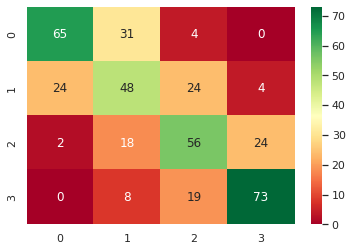

In [77]:
LR_modelll.fit(train_reduced1,y_train)
y_pred = LR_modelll.predict(test_reduced1)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

In [78]:
pca = PCA(n_components = 0.8)
pca.fit(X_std_train)
train_reduced2 = pca.transform(X_std_train)
test_reduced2 = pca.transform(X_std_test)
print('Original Dimensions: ',X_std_train.shape)  
print('Reduced Dimensions: ',train_reduced2.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 14)


Accuracy: 0.7075


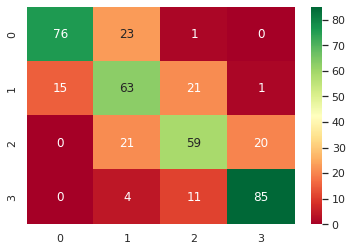

In [79]:
LR_modelll.fit(train_reduced2,y_train)
y_pred = LR_modelll.predict(test_reduced2)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

In [80]:
pca = PCA(n_components = 0.9)
pca.fit(X_std_train)
train_reduced3 = pca.transform(X_std_train)
test_reduced3 = pca.transform(X_std_test)
print('Original Dimensions: ',X_std_train.shape)  
print('Reduced Dimensions: ',train_reduced3.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 16)


Accuracy: 0.9525


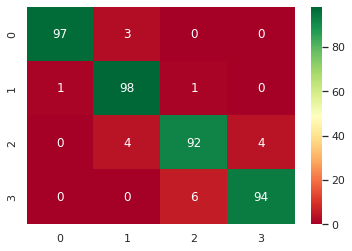

In [81]:
LR_modelll.fit(train_reduced3,y_train)
y_pred = LR_modelll.predict(test_reduced3)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

In [82]:
pca = PCA(n_components = 0.95)
pca.fit(X_std_train)
train_reduced4 = pca.transform(X_std_train)
test_reduced4 = pca.transform(X_std_test)
print('Original Dimensions: ',X_std_train.shape)  
print('Reduced Dimensions: ',train_reduced4.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 18)


Accuracy: 0.96


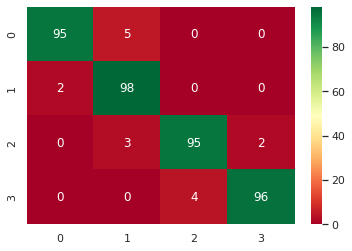

In [83]:
LR_modelll.fit(train_reduced4,y_train)
y_pred = LR_modelll.predict(test_reduced4)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

In [84]:
pca = PCA(n_components = 0.99)
pca.fit(X_std_train)
train_reduced5 = pca.transform(X_std_train)
test_reduced5 = pca.transform(X_std_test)
print('Original Dimensions: ',X_std_train.shape)  
print('Reduced Dimensions: ',train_reduced5.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 20)


Accuracy: 0.9675


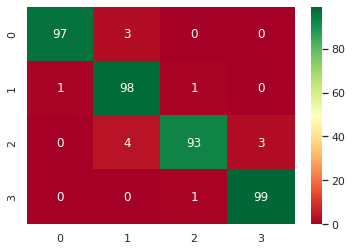

In [85]:
LR_modelll.fit(train_reduced5,y_train)
y_pred = LR_modelll.predict(test_reduced5)

confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(y_test, y_pred))

دلیل استفاده از pca  
در مواری که ابعاد دیتاست بسیار بزرگ است و تعداد فیچر ها بالا است باعث پیچیده شدن مدل ها میشود و در نتیجه دچار حجم بالای محاسبات و قابل فهم نبودن نتایج برای 
کاربر خواهیم شد

در این حالت کاهش ابعاد راه حل ما خواهد بود

 این روش داده‌های ما را از فضای اصلی که فیچر‌ها ممکن است با هم کورولیشن داشته باشند به فضای جدیدی میبرد که در فضای جدید فیچرها باهم کورولیشنی ندارند 
در این دیتاست دیدیم که کاهش ابعاد تاثیر افزایشی زیادی روی دقت مدل نداشت وبه دقتی بالاتر از در حالت اسکیل شده دست نیافتیم 

# TASK 10

combine classes

In [86]:
combined_df = df.copy()
combined_df['price_range'] = df['price_range'].replace([1,2,3],5)
combined_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [87]:
com_X=combined_df.drop(['price_range'], axis=1)
com_y=combined_df['price_range']
cX_train,cX_test,cy_train,cy_test=train_test_split(com_X,com_y,test_size=0.2,random_state=50,stratify=y)
cX_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
132,645,0,0.5,0,1,0,41,1.0,197,7,10,327,580,2962,12,9,4,1,1,1
1020,1119,0,0.5,1,0,1,23,0.4,164,4,1,821,915,3520,7,4,7,1,0,0
868,981,1,1.9,1,0,0,2,0.1,136,3,7,75,688,1539,19,12,19,0,0,0
1640,1269,1,2.8,1,16,0,41,1.0,180,8,17,406,1036,2341,10,9,16,0,0,1
263,767,0,1.5,0,4,0,28,0.7,175,4,10,344,1517,527,10,0,15,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,1762,1,2.5,0,10,1,15,0.3,107,8,11,1103,1364,2183,8,3,11,1,1,0
619,598,0,2.3,1,7,0,21,0.7,196,2,10,680,1173,3293,8,4,7,1,0,1
276,1662,0,0.5,0,0,1,61,0.8,126,4,13,32,1509,3760,9,5,13,1,1,1
788,1501,0,1.1,0,12,1,2,0.2,187,1,15,198,1056,2487,13,12,16,1,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9525


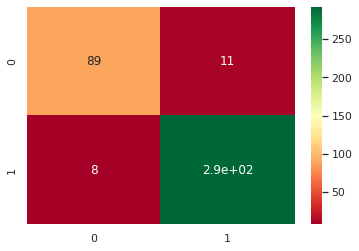

In [88]:
LR_modelll.fit(cX_train,cy_train)
cy_pred = LR_modelll.predict(cX_test)

confusion_m = confusion_matrix(cy_test, cy_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(cy_test, cy_pred))

Accuracy of Naive Bayes Classifier is:  0.9575


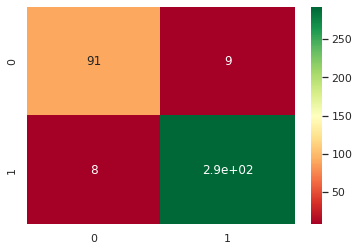

In [89]:
NB_model.fit(cX_train,cy_train)
cy_pred = NB_model.predict(cX_test)

confusion_m = confusion_matrix(cy_test, cy_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of Naive Bayes Classifier is: ", accuracy_score(cy_test,cy_pred)) 

In [90]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

print(Counter(com_y))

sampler = make_pipeline( RandomUnderSampler(random_state=0, sampling_strategy={0: 100}), SMOTE(random_state=0))
X_resampled, y_resampled = sampler.fit_resample(com_X, com_y)
print(Counter(y_resampled))
print(Counter(X_resampled))
print(y_resampled.shape)
print(X_resampled.shape)

Counter({5: 1500, 0: 500})
Counter({0: 1500, 5: 1500})
Counter({'battery_power': 1, 'blue': 1, 'clock_speed': 1, 'dual_sim': 1, 'fc': 1, 'four_g': 1, 'int_memory': 1, 'm_dep': 1, 'mobile_wt': 1, 'n_cores': 1, 'pc': 1, 'px_height': 1, 'px_width': 1, 'ram': 1, 'sc_h': 1, 'sc_w': 1, 'talk_time': 1, 'three_g': 1, 'touch_screen': 1, 'wifi': 1})
(3000,)
(3000, 20)


In [91]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=50,stratify=y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9633333333333334


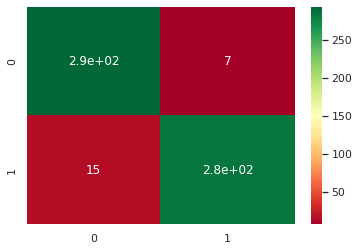

In [92]:
LR_modelll.fit(Xr_train,yr_train)
yr_pred = LR_modelll.predict(Xr_test)

confusion_m = confusion_matrix(yr_test, yr_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print("Accuracy:",accuracy_score(yr_test, yr_pred))

Accuracy of Naive Bayes Classifier is:  0.9616666666666667


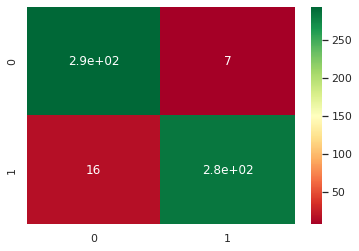

In [93]:
NB_model.fit(Xr_train,yr_train)
yr_pred = NB_model.predict(Xr_test)

confusion_m = confusion_matrix(yr_test, yr_pred)
sns.heatmap(confusion_m,annot=True,cmap="RdYlGn")
print ("Accuracy of Naive Bayes Classifier is: ", accuracy_score(yr_test,yr_pred)) 

# extra

In [94]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 837 kB 5.4 MB/s 
     |████████████████████████████████| 136 kB 33.0 MB/s 
     |████████████████████████████████| 830 kB 36.9 MB/s 
     |████████████████████████████████| 822 kB 17.9 MB/s 
     |████████████████████████████████| 802 kB 44.0 MB/s 
     |████████████████████████████████| 802 kB 38.0 MB/s 
     |████████████████████████████████| 793 kB 42.2 MB/s 
     |████████████████████████████████| 793 kB 42.2 MB/s 
     |████████████████████████████████| 791 kB 45.0 MB/s 
     |████████████████████████████████| 786 kB 42.2 MB/s 
     |████████████████████████████████| 779 kB 43.0 MB/s 
     |████████████████████████████████| 778 kB 44.1 MB/s 
     |████████████████████████████████| 776 kB 38.3 MB/s 
     |████████████████████████████████| 769 kB 53.3 MB/s 
     |████████████████████████████████| 766 kB 48.4 MB/s 
     |████████████████████████████████| 1.0 MB 50.9 MB/s 
     |████████████████████████████████| 722 kB 58.6 MB/s 
     |█████████

In [95]:
import dask
import dask.dataframe as dd

In [96]:
ddf = dd.from_pandas(TMPdf, npartitions=2)

In [97]:
ddf.partitions[0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
npartitions=1,,,,,,,,,,,,,,,,,,,,,
0,int64,int64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
1000,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [98]:
start = time.time()
ddf.isnull().sum()
print('run time : ' , (time.time() - start)) 

run time :  0.022936344146728516


In [99]:
# check outliers using IQR
start = time.time()
Q1 = ddf.quantile(0.25)
Q3 = ddf.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
print('run time : ' , (time.time() - start)) 

run time :  0.10558271408081055
